In [2]:
%pip install -q transformers
%pip install -q -U sentencepiece
%pip install ultralytics
%pip install roboflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached roboflow-1.1.27-py3-none-any.whl.metadata (9.3 kB)
  Using cached certifi-2023.7.22-py3-none-any.whl.metadata (2.2 kB)
  Using cached idna-2.10-py2.py3-none-any.whl.metadata (9.1 kB)
Using cached roboflow-1.1.27-py3-none-any.whl (74 kB)
Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idna-3.4
  Attempting uninstall: certifi
    Found existing installation: certifi 2022.12.7
    Uninstalling certifi-2022.12.7:
      Successfully uninstalled certifi-2022.12.7
Note: you may need to restart the kernel to use updated packages.


In [10]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
from tqdm.auto import tqdm
from urllib.request import urlretrieve
from zipfile import ZipFile


import numpy as np
import matplotlib.pyplot as plt
import torch
import glob

In [11]:
%matplotlib inline

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="JafCsGl2bvsf1J3GMSV3")
project = rf.workspace("university-of-peshawar-4qet5").project("new-dataset-xjgtk")
version = project.version(5)
dataset = version.download("yolov8-obb")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to new-Dataset-5 in yolov8-obb:: 100%|██████████| 5348/5348 [00:06<00:00, 786.32it/s]


In [12]:
torch.cuda.is_available()

True

In [17]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

for i, (name, param) in enumerate(model.named_parameters()):
    print(i, name)

0 model.model.0.conv.weight
1 model.model.0.bn.weight
2 model.model.0.bn.bias
3 model.model.1.conv.weight
4 model.model.1.bn.weight
5 model.model.1.bn.bias
6 model.model.2.cv1.conv.weight
7 model.model.2.cv1.bn.weight
8 model.model.2.cv1.bn.bias
9 model.model.2.cv2.conv.weight
10 model.model.2.cv2.bn.weight
11 model.model.2.cv2.bn.bias
12 model.model.2.m.0.cv1.conv.weight
13 model.model.2.m.0.cv1.bn.weight
14 model.model.2.m.0.cv1.bn.bias
15 model.model.2.m.0.cv2.conv.weight
16 model.model.2.m.0.cv2.bn.weight
17 model.model.2.m.0.cv2.bn.bias
18 model.model.3.conv.weight
19 model.model.3.bn.weight
20 model.model.3.bn.bias
21 model.model.4.cv1.conv.weight
22 model.model.4.cv1.bn.weight
23 model.model.4.cv1.bn.bias
24 model.model.4.cv2.conv.weight
25 model.model.4.cv2.bn.weight
26 model.model.4.cv2.bn.bias
27 model.model.4.m.0.cv1.conv.weight
28 model.model.4.m.0.cv1.bn.weight
29 model.model.4.m.0.cv1.bn.bias
30 model.model.4.m.0.cv2.conv.weight
31 model.model.4.m.0.cv2.bn.weight
32 model

In [22]:
freeze = [f'model.{x}.' for x in range(22)]  

for k, v in model.named_parameters():
    v.requires_grad = True  # train all layers
    if any(x in k for x in freeze):
        print(f'freezing {k}')
        v.requires_grad = False


results = model.train(data='C:/Users/aksha/OneDrive/Documents/Programming/OCR/YOLO+TrOCR/new-Dataset-5\data.yaml',
                      epochs=10,
                      imgsz=832,
                      device=[0],
                      patience=10,
                      cache=False,
                      verbose=True,
                      box=10,
                      dropout=0.1,)

freezing model.model.0.conv.weight
freezing model.model.0.bn.weight
freezing model.model.0.bn.bias
freezing model.model.1.conv.weight
freezing model.model.1.bn.weight
freezing model.model.1.bn.bias
freezing model.model.2.cv1.conv.weight
freezing model.model.2.cv1.bn.weight
freezing model.model.2.cv1.bn.bias
freezing model.model.2.cv2.conv.weight
freezing model.model.2.cv2.bn.weight
freezing model.model.2.cv2.bn.bias
freezing model.model.2.m.0.cv1.conv.weight
freezing model.model.2.m.0.cv1.bn.weight
freezing model.model.2.m.0.cv1.bn.bias
freezing model.model.2.m.0.cv2.conv.weight
freezing model.model.2.m.0.cv2.bn.weight
freezing model.model.2.m.0.cv2.bn.bias
freezing model.model.3.conv.weight
freezing model.model.3.bn.weight
freezing model.model.3.bn.bias
freezing model.model.4.cv1.conv.weight
freezing model.model.4.cv1.bn.weight
freezing model.model.4.cv1.bn.bias
freezing model.model.4.cv2.conv.weight
freezing model.model.4.cv2.bn.weight
freezing model.model.4.cv2.bn.bias
freezing mode

RuntimeError: Dataset 'C://Users/aksha/OneDrive/Documents/Programming/OCR/YOLO+TrOCR/new-Dataset-5/data.yaml' error  
Dataset 'C://Users/aksha/OneDrive/Documents/Programming/OCR/YOLO+TrOCR/new-Dataset-5/data.yaml' images not found , missing path 'C:\Users\aksha\OneDrive\Documents\Programming\OCR\new-Dataset-5\valid\images'
Note dataset download directory is 'C:\Users\aksha\OneDrive\Documents\Programming\OCR\datasets'. You can update this in 'C:\Users\aksha\AppData\Roaming\Ultralytics\settings.yaml'

In [8]:
import cv2
from PIL import Image

model = YOLO("best_20.pt")
image = Image.open("test_images/7.jpeg")
image = image.convert("RGB")
image = image.resize((640,480))
image.save("test_images/7.jpeg")
results = model.predict("test_images/7.jpeg",iou=0.5,conf=0.5)

FileNotFoundError: [Errno 2] No such file or directory: 'test_images/7.jpeg'

In [72]:
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.show()
    result.save(filename='result.jpg')

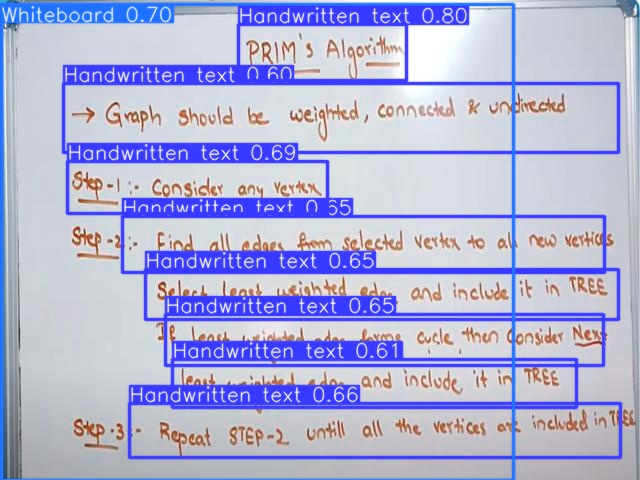

In [74]:
import cv2
from PIL import Image

Image.fromarray(cv2.imread("result.jpg"))

In [75]:
text_detections = list()


for result in results:
  boxes = result.boxes
  for box in boxes:
    if 0 in box.cls:  # Class 0 corresponds to text
            text_detections.append(box)

for box in text_detections:
    x1, y1, x2, y2 = box.xyxy[0]
    #print(f"Text detected at: ({x1}, {y1}) - ({x2}, {y2})")
    print(f"Text detected at: ({x1}, {y1}, {x2 - x1}, {y2 - y1})")

Text detected at: (238.58567810058594, 24.81369972229004, 168.3214569091797, 55.71111297607422)
Text detected at: (67.79427337646484, 161.1025390625, 259.9288330078125, 52.34248352050781)
Text detected at: (129.5095672607422, 403.1719055175781, 491.30108642578125, 54.724884033203125)
Text detected at: (145.51133728027344, 269.0884094238281, 472.613037109375, 49.925628662109375)
Text detected at: (165.49081420898438, 314.0343933105469, 438.1024475097656, 51.466888427734375)
Text detected at: (122.8132553100586, 216.26681518554688, 481.8278503417969, 56.2060546875)
Text detected at: (172.94711303710938, 359.34735107421875, 403.6358337402344, 47.748870849609375)
Text detected at: (63.203407287597656, 83.18736267089844, 554.8587646484375, 69.08869934082031)


In [76]:
import os
import shutil
if os.path.exists("output"):
    shutil.rmtree("output")

for box in text_detections:
  x1, y1, x2, y2 =  [int(coord.item()) for coord in box.xyxy[0]]
  image = Image.open("test_images/7.jpeg")

  image = image.convert("RGB")

  output_folder = 'output'
  os.makedirs(output_folder, exist_ok=True)

  cropped_image = image.crop((x1, y1, x2, y2))
  cropped_image.save(os.path.join(output_folder, f"cropped_image_x1_{x1}_y1_{y1}_x2_{x2}_y2_{y2}.jpg"))


In [15]:
device = torch.device('cuda:0' if torch.cuda.is_available else 'cpu')
device

device(type='cuda', index=0)

In [16]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assets....", end="")


    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)


    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])


        print("Done")


    except Exception as e:
        print("\nInvalid file.", e)

URL = r"https://www.dropbox.com/scl/fi/jz74me0vc118akmv5nuzy/images.zip?rlkey=54flzvhh9xxh45czb1c8n3fp3&dl=1"
asset_zip_path = os.path.join(os.getcwd(), "images.zip")
# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

In [17]:
def read_image(image_path):
    """
    :param image_path: String, path to the input image.


    Returns:
        image: PIL Image.
    """
    image = Image.open(image_path).convert('RGB')
    return image

In [18]:
def ocr(image, processor, model):
    """
    :param image: PIL Image.
    :param processor: Huggingface OCR processor.
    :param model: Huggingface OCR model.


    Returns:
        generated_text: the OCR'd text string.
    """
    # We can directly perform OCR on cropped images.
    pixel_values = processor(image, return_tensors='pt').pixel_values.to(device)
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return generated_text

In [59]:

import re
from tqdm import tqdm

def extract_coordinates(image_path):

    match = re.search(r'cropped_image_x1_(\d+)_y1_(\d+)_x2_(\d+)_y2_(\d+).jpg', image_path)
    if match:
        x1, y1, x2, y2 = map(int, match.groups())
        return x1, y1, x2, y2
    else:
        return None

In [60]:
def eval_new_data(data_path=None, num_samples=4, model=None):
    image_paths = glob.glob(data_path)
    texts = {}
    for i, image_path in tqdm(enumerate(image_paths), total=len(image_paths)):
        if i == num_samples:
            break
        image = read_image(image_path)
        text = ocr(image, processor, model)
        coordinates = extract_coordinates(image_path)
        if coordinates:
            texts[coordinates] = text
        plt.figure(figsize=(7, 4))
        plt.imshow(image)
        plt.title(text)
        plt.axis('off')
        plt.show()
    return texts

In [25]:
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-small-printed')
model = VisionEncoderDecoderModel.from_pretrained(
    'microsoft/trocr-small-printed'
).to(device)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-small-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/2 [00:00<?, ?it/s]

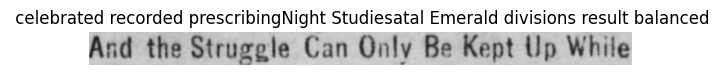

 50%|█████     | 1/2 [00:00<00:00,  1.75it/s]

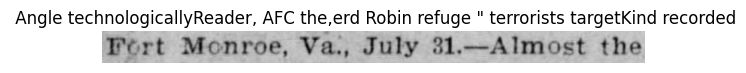

100%|██████████| 2/2 [00:00<00:00,  2.12it/s]


In [61]:
texts = eval_new_data(
    data_path=os.path.join('images', 'newspaper', '*'),
    num_samples=2,
    model=model
)

In [63]:
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model1 = VisionEncoderDecoderModel.from_pretrained(
    'microsoft/trocr-base-handwritten'
).to(device)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/2 [00:00<?, ?it/s]C:\Users\aksha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\transformers\generation\utils.py:1132: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


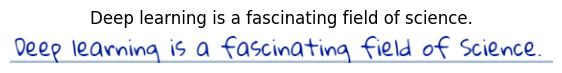

 50%|█████     | 1/2 [00:00<00:00,  1.36it/s]

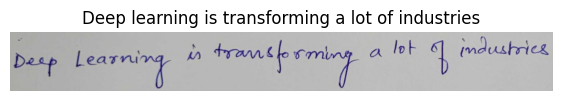

100%|██████████| 2/2 [00:01<00:00,  1.47it/s]


{}

In [69]:
eval_new_data(
    data_path=os.path.join('images', 'handwritten', '*'),
    num_samples=2,
    model=model1
)

  0%|          | 0/8 [00:00<?, ?it/s]

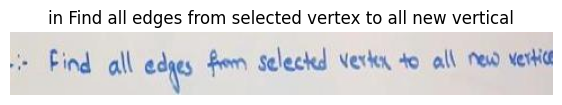

 12%|█▎        | 1/8 [00:00<00:04,  1.55it/s]

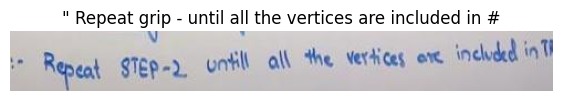

 25%|██▌       | 2/8 [00:01<00:03,  1.61it/s]

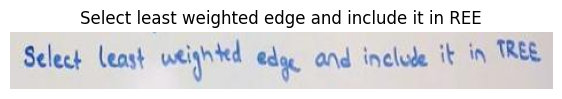

 38%|███▊      | 3/8 [00:01<00:02,  1.72it/s]

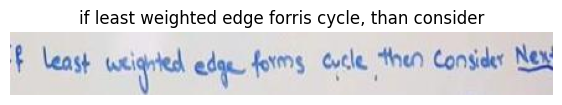

 50%|█████     | 4/8 [00:02<00:02,  1.79it/s]

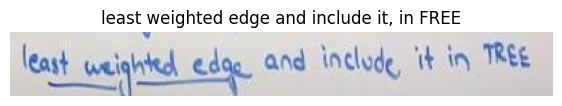

 62%|██████▎   | 5/8 [00:02<00:01,  1.81it/s]

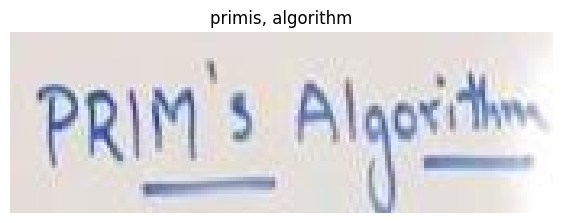

 75%|███████▌  | 6/8 [00:03<00:00,  2.13it/s]

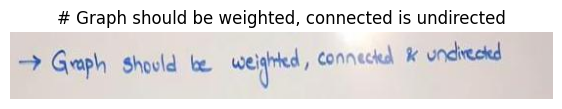

 88%|████████▊ | 7/8 [00:03<00:00,  2.07it/s]

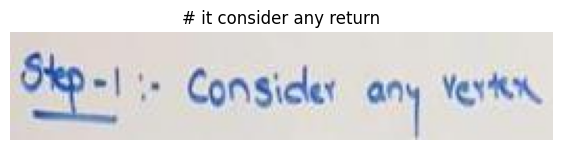

100%|██████████| 8/8 [00:04<00:00,  1.99it/s]


In [77]:
texts = eval_new_data(
    data_path=os.path.join('output',"*"),
    num_samples=len(text_detections),
    model=model1
)

In [89]:
model = YOLO("best_20.pt")
image = Image.open("test_images/8.jpeg")
image = image.convert("RGB")
image = image.resize((640,480))
image.save("test_images/8.jpeg")
results = model.predict("test_images/8.jpeg",iou=0.5,conf=0.5)


image 1/1 c:\Users\aksha\OneDrive\Documents\Programming\OCR\test_images\8.jpeg: 640x832 10 Handwritten texts, 109.0ms
Speed: 8.0ms preprocess, 109.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 832)


In [90]:
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.show()
    result.save(filename='result.jpg')

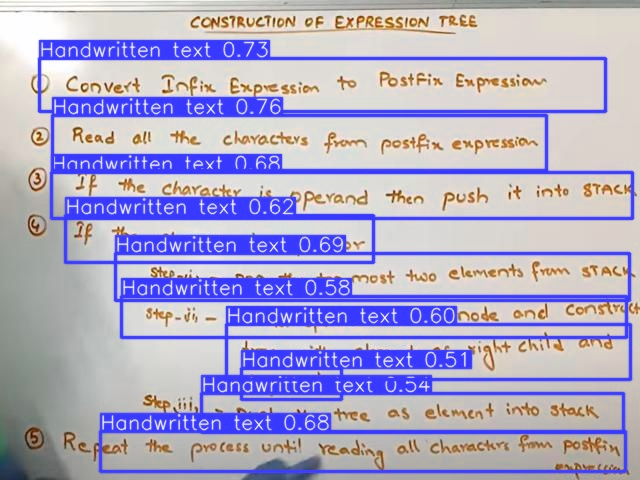

In [91]:
import cv2
from PIL import Image

Image.fromarray(cv2.imread("result.jpg"))

In [92]:
text_detections = list()


for result in results:
  boxes = result.boxes
  for box in boxes:
    if 0 in box.cls:  # Class 0 corresponds to text
            text_detections.append(box)

for box in text_detections:
    x1, y1, x2, y2 = box.xyxy[0]
    #print(f"Text detected at: ({x1}, {y1}) - ({x2}, {y2})")
    print(f"Text detected at: ({x1}, {y1}, {x2 - x1}, {y2 - y1})")

Text detected at: (52.374595642089844, 115.54478454589844, 493.9951477050781, 54.82176208496094)
Text detected at: (39.925724029541016, 58.027061462402344, 565.9840087890625, 53.23567199707031)
Text detected at: (115.69730377197266, 253.5279083251953, 514.2574462890625, 47.07600402832031)
Text detected at: (51.978572845458984, 172.46591186523438, 580.4977416992188, 46.02093505859375)
Text detected at: (100.37752532958984, 431.102294921875, 524.814453125, 40.4342041015625)
Text detected at: (65.93717193603516, 215.54029846191406, 307.50958251953125, 46.75001525878906)
Text detected at: (226.7720947265625, 324.3580322265625, 404.1182861328125, 55.631439208984375)
Text detected at: (121.06501770019531, 296.9686584472656, 505.44512939453125, 40.571624755859375)
Text detected at: (201.2051239013672, 393.78607177734375, 422.6297607421875, 38.32745361328125)
Text detected at: (241.526123046875, 368.0553283691406, 99.7652587890625, 31.351806640625)


In [93]:
if os.path.exists("output"):
    shutil.rmtree("output")

for box in text_detections:
  x1, y1, x2, y2 =  [int(coord.item()) for coord in box.xyxy[0]]
  image = Image.open("test_images/8.jpeg")

  image = image.convert("RGB")

  output_folder = 'output'
  os.makedirs(output_folder, exist_ok=True)

  cropped_image = image.crop((x1, y1, x2, y2))
  cropped_image.save(os.path.join(output_folder, f"cropped_image_x1_{x1}_y1_{y1}_x2_{x2}_y2_{y2}.jpg"))

  0%|          | 0/10 [00:00<?, ?it/s]C:\Users\aksha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\transformers\generation\utils.py:1132: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


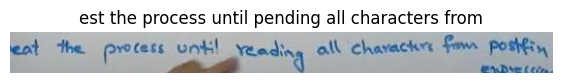

 10%|█         | 1/10 [00:00<00:06,  1.31it/s]

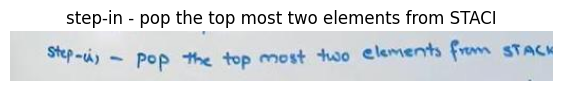

 20%|██        | 2/10 [00:01<00:06,  1.28it/s]

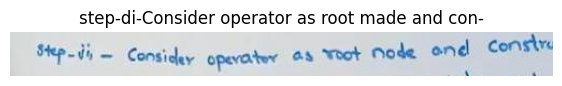

 30%|███       | 3/10 [00:02<00:04,  1.44it/s]

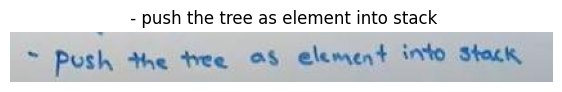

 40%|████      | 4/10 [00:02<00:03,  1.61it/s]

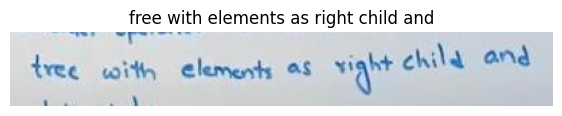

 50%|█████     | 5/10 [00:03<00:03,  1.48it/s]

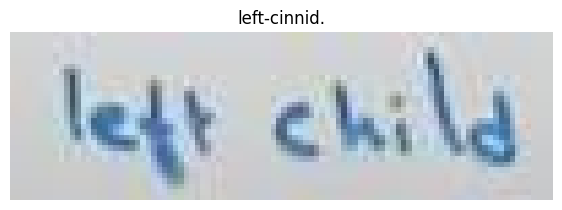

 60%|██████    | 6/10 [00:04<00:02,  1.51it/s]

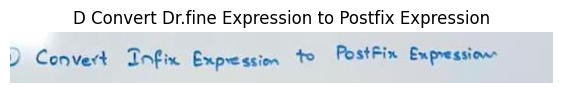

 70%|███████   | 7/10 [00:04<00:01,  1.55it/s]

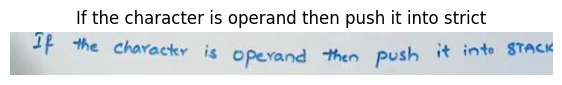

 80%|████████  | 8/10 [00:05<00:01,  1.60it/s]

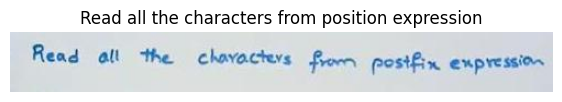

 90%|█████████ | 9/10 [00:05<00:00,  1.75it/s]

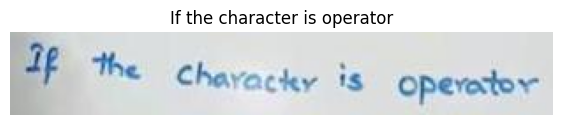

100%|██████████| 10/10 [00:06<00:00,  1.64it/s]


In [94]:
texts = eval_new_data(
    data_path=os.path.join('output',"*"),
    num_samples=len(text_detections),
    model=model1
)

In [95]:
!pip install python-pptx

   ---------------------------------------- 471.6/471.6 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 159.9/159.9 kB 1.1 MB/s eta 0:00:00


In [98]:
from pptx import Presentation
from pptx.util import Inches

# Function to add text box to slide
def add_text_box(slide, left, top, width, height, text):
    txBox = slide.shapes.add_textbox(left, top, width, height)
    tf = txBox.text_frame
    tf.word_wrap = True
    p = tf.add_paragraph()
    p.text = text


# Create a presentation object
prs = Presentation()

# Add a slide to the presentation
slide = prs.slides.add_slide(prs.slide_layouts[6])  # Use a blank slide layout


# Loop through bounding boxes and add text boxes
for bbox in texts:
    left, top, width, height = bbox
    add_text_box(slide, Inches(left/72), Inches(top/72), Inches(width/72), Inches(height/72), texts[bbox])

# Save the presentation
prs.save("output.pptx")